# MNIST Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## 2. Data Preprocessing

In [2]:
# Load the MNIST dataset.
mnist = tf.keras.datasets.mnist
train_data, test_data = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [3]:
# Divide the data
train_images, train_labels = train_data
test_images, test_labels = test_data

In [4]:
# Reshape and normalize the images.
X_train = train_images.reshape((60000, 28, 28, 1))
X_train = X_train.astype('float32') / 255
X_test = test_images.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

In [5]:
# Reshape the labels and encode them categorically.
y_train = tf.keras.utils.to_categorical(train_labels)
y_test = tf.keras.utils.to_categorical(test_labels)

In [6]:
print("Training Images:", X_train.shape)
print("Testing Images:", X_test.shape)
print("Training Labels:", y_train.shape)
print("Test Labels:", y_test.shape)

Training Images: (60000, 28, 28, 1)
Testing Images: (10000, 28, 28, 1)
Training Labels: (60000, 10)
Test Labels: (10000, 10)


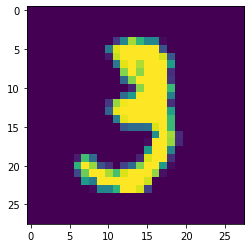

In [7]:
plt.imshow(train_images[10])
plt.show()

## 3. Convolutional Neural Network (CNN)

### 3.1. Define the Model

In [8]:
model = tf.keras.models.Sequential()

Metal device set to: Apple M1 Pro


2022-05-09 09:37:47.292229: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-09 09:37:47.292750: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

Once our model is defined, we can compile it using the Adam optimizer and the categorical cross-entropy loss function.

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 3.2. Train the Model

10 epochs, batch size of 128

In [12]:
num_epochs = 10
batch_size = 128

history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

2022-05-09 09:37:59.488493: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-09 09:37:59.668725: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10
469/469 [==============================] - ETA: 0s - loss: 0.2409 - accuracy: 0.9268

2022-05-09 09:38:08.963659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 10s 15ms/step - loss: 0.2409 - accuracy: 0.9268 - val_loss: 0.0739 - val_accuracy: 0.9771
Epoch 2/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0604 - accuracy: 0.9812 - val_loss: 0.0421 - val_accuracy: 0.9865
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0418 - accuracy: 0.9874 - val_loss: 0.0327 - val_accuracy: 0.9898
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0335 - accuracy: 0.9898 - val_loss: 0.0375 - val_accuracy: 0.9874
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0261 - accuracy: 0.9918 - val_loss: 0.0300 - val_accuracy: 0.9897
Epoch 6/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0217 - accuracy: 0.9931 - val_loss: 0.0387 - val_accuracy: 0.9883
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0190 - accuracy: 0.9938 - val_loss: 0.0415 - val_accuracy: 0.9868
Epoch 8/1

## 4. Make a Prediction

In [14]:
predictions = model.predict(X_test)

2022-05-09 09:39:27.272770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


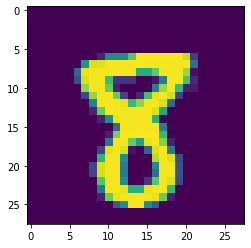

In [15]:
index = 128

plt.imshow(test_images[index])
plt.show()

In [17]:
print(np.argmax(predictions[index]))

8
